# Descripción del proyecto 

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Descripción de datos
— Name (Nombre)

— Platform (Plataforma)

— Year_of_Release (Año de lanzamiento)

— Genre (Género) 

— NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 

— EU_sales (ventas en Europa en millones de dólares estadounidenses) 

— JP_sales (ventas en Japón en millones de dólares estadounidenses) 

— Other_sales (ventas en otros países en millones de dólares estadounidenses) 

— Critic_Score (máximo de 100) 

— User_Score (máximo de 10) 

— Clasificación (ESRB)

Es posible que los datos de 2016 estén incompletos.

## Paso 1. Descripción de los datos

## 1.1 Inicialización

In [1]:
## Cargar librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px

## 1.2 Cargar datos

In [2]:
df_games=pd.read_csv("./data/games.csv")

## Paso 2. Preparar datos 

2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

2.2 Convierte los datos en los tipos necesarios.

2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

2.4 Si es necesario, elige la manera de tratar los valores ausentes:

    2.4.1 Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

    2.4.2 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

    2.4.3 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.
    
2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Conclusiones

Podemos observar que tenemos 16715 datos en total y 10 columnas no obstante cabe resaltar que tenemos datos ausentes en las siguientes columnas _Rating_, _User Score_, _Critic Score_,_Name_, _Year of Release_ y _Genre_.

### 2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [5]:
#df_games.columns.str.lower()
new_columns=[]
for columns_lower in df_games.columns:
    lower=columns_lower.lower()
    new_columns.append(lower)
df_games.columns=new_columns

print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


La modificación de remplazar los nombres de cada columna en minúscula  se debe a que será más fácil de procesar estos datos más adelante.

### 2.2 Conversión de datos

In [6]:
df_games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Como podemos observar tenemos el  "tbd " o to be determined, que es un tipo de valor ausente.

In [7]:
#Tratamos la conversión de valores ausentes y el tbd
df_games["user_score"]=pd.to_numeric(df_games["user_score"],errors="coerce")
#Verificamos que no exista el tbd
df_games["user_score"].unique()


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Podemos Observar que la columna user_score era de tipo object o de tipo string, en esta caso la convertimos a tipo numérico ya que sin esta modificación no podríamos realizar cálculos o en general evaluar dicha columna para nuestro respectivo análisis de datos, abajo podemos verificar que todas las columnas esten en correcto estado.



In [8]:
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [9]:
df_games.isna().sum()/df_games.shape[0]*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Como ya habiamos analizado al principio del proyecto observamos las siguientes columnas que contenian datos ausentes, al hacer el respectivo analisis de cuantos valores ausentes tiene cada uno podemos observar lo siguiente:

*critic_score* Contiene el 51.31% valores usentes columna de tipo numerico (float)

*user_score* Contiene el 54.59% valores ausentes columna de tipo numerico (float)

*rating* Contiene el 54.59% valores ausentes columna de tipo String 

Estas tres columnas es donde se concentrar la mayor parte de los datos ausentes, Por otro lado tenemos:

*year_of_release* Contiene el 1.60% valores ausentes tipo string

*name* y *genre* Contiene el 0.011% ausentes tipo string

In [10]:
df_games.duplicated().sum()

0

No existen duplicados.

### Calcular ventas totales

In [11]:
df_games["total_sales"]=df_games["na_sales"]+df_games["jp_sales"]+df_games["eu_sales"]+df_games["other_sales"]

## Conclusión del paso 2

Ahora con la información dada podremos contestar las preguntas que formulamos

1. ¿Por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco?

En este caso los valores ausentes quedaran en blanco ya que si los modificamos ya sea por la media o la mediana o tan solo cambiarlos por cero, al hacer nuestro análisis correspondiente no será lo más acertado, sin embargo se pueden rellenar con información de otras fuentes.

2. ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Puede que los datos no estuvieran disponibles. 

No se procuparon por llenar esos campos.

No se conocia el valor correcto.

3. ¿Cómo se manejo la abreviatura TBD? 

En este caso lo manejamos con el método de la libreria pandas _pd.to_numeric_, ya que tiene un parámetro *errors="coerce"* que lo que hace es remplazar los valores inválidos por Nan.


# Paso 3 Analiza los datos

3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

3.5 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

3.6 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

3.7 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

3.8 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [12]:
df_games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


### 3.1 Juegos Lanzados por año

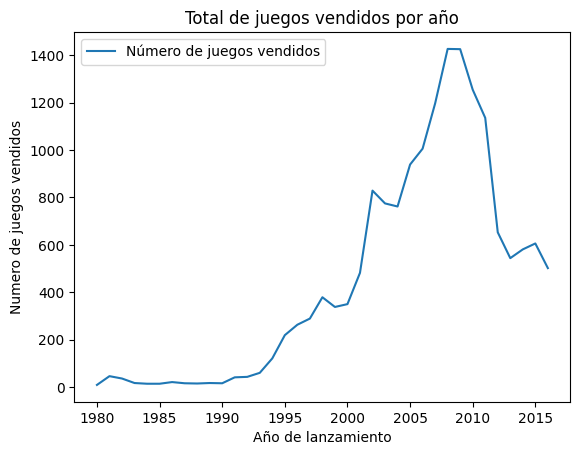

In [13]:
games=df_games.groupby("year_of_release")[["name"]].count().reset_index()

games.plot(kind="line",x="year_of_release",y="name",ylabel="Numero de juegos vendidos",xlabel="Año de lanzamiento")
plt.title("Total de juegos vendidos por año")
plt.legend(["Número de juegos vendidos"])

plt.show()


In [14]:
fig = px.histogram(df_games,x="year_of_release", title=" Total de juegos lanzados por año", nbins=10)
fig.update_layout(xaxis_title = 'Año de lanzamiento' , yaxis_title= 'total de juegos')
fig.show()

In [15]:
fig = px.bar(games, x="year_of_release", y="name", title="Total de juegos vendidos por año")
fig.update_layout(xaxis_title = 'Año de lanzamiento' , yaxis_title= 'total de juegos')
fig.show()

Como podemos observar tenemos diferentes puntos significativos como: 
    
    + Un pico de ventas de 2005 a 2009.

    + Antes del año 1994 no se vendian tantos juegos. 

    + Los picos mas altos fueron en los años 2008 y 2009.

    

### 3.2 Ventas por plataforma

In [16]:
venta=df_games.groupby("platform")["total_sales"].sum().reset_index().sort_values(by="total_sales",ascending=False).head(10)
venta

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [17]:
platform_list=("PS2","X360","PS3","Wii","DS","PS","GBA","PS4","PSP","PC")
df_games2=df_games[df_games["platform"].isin(platform_list)]


<Axes: xlabel='year_of_release', ylabel='total_sales'>

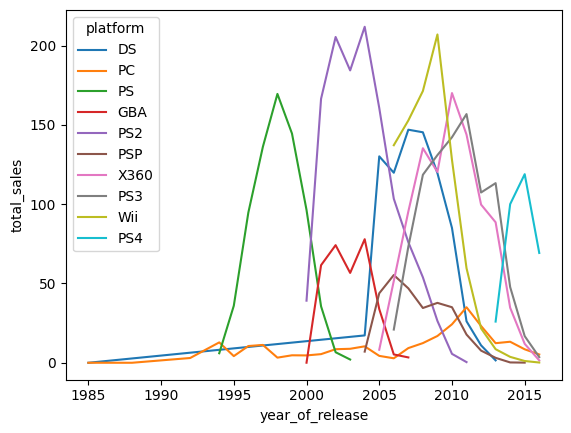

In [18]:
paltform=df_games2.groupby(["year_of_release","platform"])["total_sales"].sum().reset_index()
paltform

sns.lineplot(data=paltform, hue="platform", x="year_of_release",y="total_sales")

In [19]:
df_games3=df_games2.groupby("platform")["genre"].count()

df_games3
fig = px.bar(df_games, x="platform", color="genre", title="Ventas por plataforma de cada género")
fig.update_layout(xaxis_title = 'Plataforma' , yaxis_title= 'total de juegos')
fig.show()

Teniendo esta información podemos concluir lo siguiente sobe lo planteado en nuestros puntos.

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Podemos decir que tienen un pico de ventas 4 años antes de que aprezca una nueva consola.

¿Qué período debes tomar datos?

Podemos tomar apartir de 1995 al 2016.

Qué plataformas son líderes en ventas? 
Como pudimos obervar tenemos las 5 primeras

| Platform| total_sales| 
|----------|----------|
| PS2      | 1255.77  | 
| X360     | 971.42   | 
| PS3      | 939.65   | 
| Wii      | 907.51   | 
| DS       | 906.12   | 

¿Cuáles crecen y cuáles se reducen?

Tenemos las ultimas consolas 

| Platform| total_sales| 
|----------|----------|
| WS       | 1.42   | 
| TG16     | 0.16   | 
| 3DO      | 0.10   | 
| GG       | 0.04   | 
| PCFX     | 0.03   | 

Las plataformas mas rentables seran:

 + XBOX 
    
+ PlayStation

También podemos obser var que las plataformas con mas géneros en juegos son.

+ PS2 

+ DS



### 3.3 Ventas globales de los juegos

[]

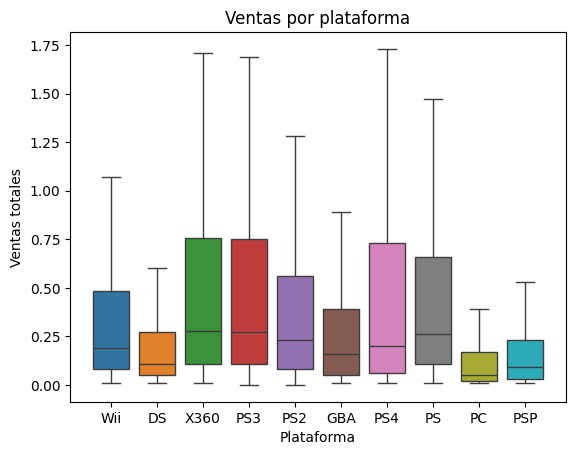

In [20]:
#6
fig=sns.boxplot(data=df_games2, x="platform",y="total_sales",showfliers=False,hue="platform")
fig.set_title('Ventas por plataforma')
fig.set_xlabel('Plataforma')
fig.set_ylabel('Ventas totales')
fig.plot()

Al observar las siguientes plataformas podemos contestar lo plateado antes:

¿Son significativas las diferencias en las ventas?

Las 10 principales plataformas en que su media más alta de ventas son x360, PS3 y PS.

¿Qué sucede con las ventas promedio en varias plataformas?

En las diferentes plataformas varia la venta promedio teniendo como más bajas la PSP, PC y DS.



### 3.4 Reseñas de Usuarios




In [21]:
critics_df = df_games.groupby(by='critic_score')["total_sales"].sum().reset_index()

fig = px.scatter(critics_df,x="critic_score",y='total_sales', title='Impacto de ventas por Puntuación')
fig.update_layout(xaxis_title='Puntuación', yaxis_title='Ventas totales')
fig.show()

In [22]:


fig = px.scatter(df_games, x="user_score", y="total_sales", color="platform",title="Impacto de ventas por Calificación de usarios de cada plataforma ")
fig.update_layout(xaxis_title='Calificación de Usuarios', yaxis_title='Ventas Totales')
fig.show()

In [23]:
df_games[["user_score","critic_score","total_sales"]].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.580878,0.088179
critic_score,0.580878,1.000000,0.245507
total_sales,0.088179,0.245507,1.000000


<Axes: xlabel='critic_score', ylabel='user_score'>

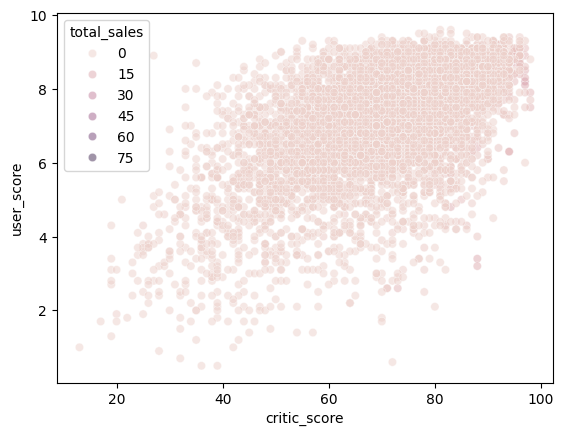

In [24]:
sns.scatterplot(df_games, x="critic_score", y="user_score",hue="total_sales",alpha=0.5)


<Axes: >

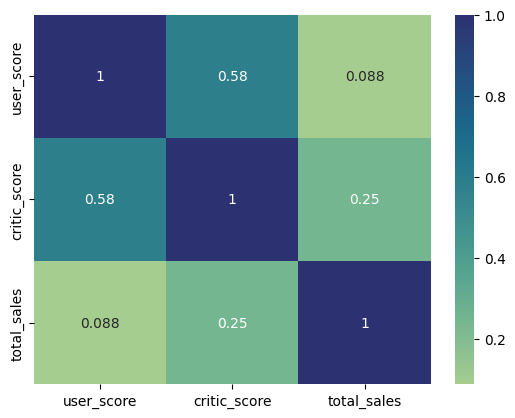

In [25]:
sns.heatmap(df_games[["user_score","critic_score","total_sales"]].corr(), annot=True, cmap="crest")

Podemos observar que la puntuación va de los 70 a los 90 de score, teniendo un pico de puntuación entre los 80 y 90.

 Al realizar la correlación de las variables entre las ventas totales, calificación de usuarios y puntuación no existe una fuerte correlación más por ende la calificación de usuarios y puntuación tiene la correlación más alta. 

 Lo que quiere decir que las puntuaciones se relacionan con las calificaciones de usuarios, aunque no sea tan fuerte la correlación ya que tiene .58.


### 3.5  Top 20 Mejores Juegos en las diferentes plataformas

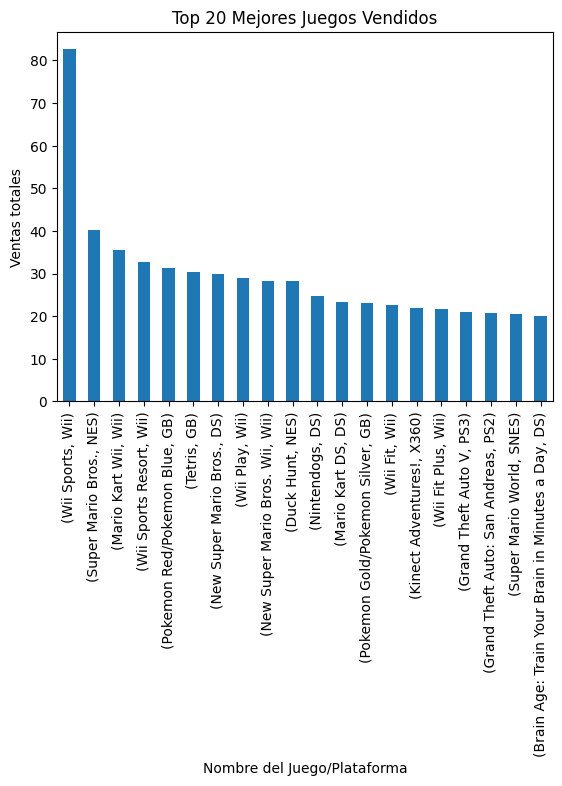

In [26]:
filtered_games = df_games.groupby(by=['name','platform'])['total_sales'].sum().sort_values(ascending=False).head(20)

filtered_games.plot(kind="bar",
           title="Top 20 Mejores Juegos Vendidos",
          xlabel="Nombre del Juego/Plataforma",
          ylabel="Ventas totales")
plt.show()

In [27]:
filtered_games = df_games.groupby(by=['name','platform'])['total_sales'].sum().sort_values(ascending=False).reset_index().tail(20)

filtered_games

fig = px.bar(filtered_games, x='name', y='total_sales',color="platform",title="Top 20 juegos menos vendidos")
fig.update_layout(xaxis_title='Juego', yaxis_title='Ventas Totales')
fig.show()


Como podemos observar tenemos un top de ventas con los juegos de WII,NES, GAME BOY, PS2, XBOX360

Haciendo un recuento histórico podemos recordar que realmente esas consolas eran las más populares en el mercado por la época.

Entre los juegos más populares tenemos WII SPORS, SUPER MARIO BROS, GTA V, GRAND THEFT AUTO SAN ANDREAS.

Ya que coincide con nuestras plataformas que vendieron más juegos.


# Paso 4 

 Para cada región (NA, UE, JP) determina:
 
4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

4.2 Los cinco géneros principales. Explica la diferencia.

4.3 las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [28]:
market_sales=df_games2.groupby("platform").agg({"na_sales":"sum",
                                                "jp_sales":"sum",
                                                "eu_sales":"sum"}).reset_index()

market_sales

,platform,na_sales,jp_sales,eu_sales
0,DS,382.40,175.57,188.89
1,GBA,187.54,47.33,75.25
2,PC,94.53,0.17,142.44
3,PS,336.52,139.82,213.61
4,PS2,583.84,139.20,339.29
5,PS3,393.49,80.19,330.29
6,PS4,108.74,15.96,141.09
7,PSP,109.17,76.78,66.68
8,Wii,496.90,69.33,262.21
9,X360,602.47,12.43,270.76


In [29]:
market_sales=pd.melt(market_sales,id_vars=["platform"],value_vars=["na_sales","jp_sales","eu_sales"],var_name="market",value_name="sales")

market_sales

,platform,market,sales
0,DS,na_sales,382.40
1,GBA,na_sales,187.54
2,PC,na_sales,94.53
3,PS,na_sales,336.52
4,PS2,na_sales,583.84
5,PS3,na_sales,393.49
6,PS4,na_sales,108.74
7,PSP,na_sales,109.17
8,Wii,na_sales,496.90
9,X360,na_sales,602.47


[]

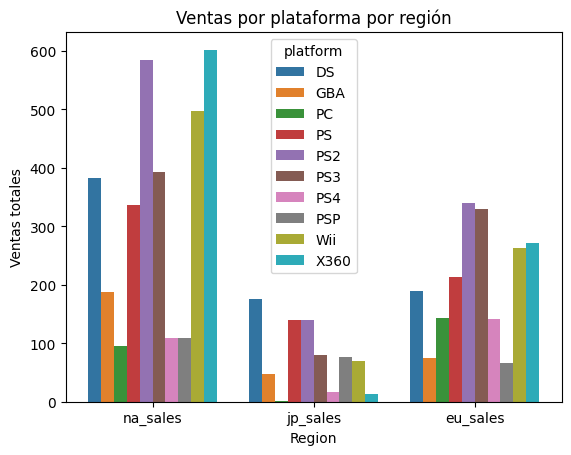

In [30]:
fig=sns.barplot(market_sales,x="market",y="sales",hue="platform")
fig.set_title('Ventas por plataforma por región')
fig.set_xlabel('Region')
fig.set_ylabel('Ventas totales')
fig.plot()

Tenemos las ventas de cada región por las ventas de cada plataforma en general podemos observar que las ventas en Norteamérica son mayores a las otras regiones.

Teniendo como principales ventas en las plataformas.

+ PS2

+ X360

+ WII

+ DS 

+ PS3

Como lo observamos en las plataformas que tenian mas ventas en cuanto Norteamérica y en las diferentes regiones varia cual plataforma vendio mas. Por ejemplo:

Region de Japón esta en primero DS, PS2 y PS3


Region de Europa esta en primero PS2, PS3 y XBOX360 



In [31]:
genre_sales=df_games2.groupby("genre").agg({"na_sales":"sum",
                                                "jp_sales":"sum",
                                                "eu_sales":"sum"}).reset_index()

#genre_sales

In [32]:
genre_sales=pd.melt(genre_sales,id_vars=["genre"],value_vars=["na_sales","jp_sales","eu_sales"],var_name="market",value_name="sales")

#genre_sales

In [33]:
fig = px.bar(genre_sales, x="market", y="sales",
             color='genre', barmode='group',
             height=400,title="Ventas por Género en cada Región")
fig.update_layout(xaxis_title='Región', yaxis_title='Ventas Totales')
fig.show()

En cuestión de la venta de los géneros tenemos el genero de acción como uno de las principales ventas en las distintas regiones,
cabe mencionar que en Norteamérica es el principal vendedor de distintos generos de juegos, seguido por Europa y al final queda Japón.

In [34]:
score_rating=df_games2.groupby("rating").agg({"na_sales":"sum",
                                                "jp_sales":"sum",
                                                "eu_sales":"sum"}).reset_index()

score_rating=pd.melt(score_rating,id_vars=["rating"],value_vars=["na_sales","jp_sales","eu_sales"],var_name="market",value_name="sales")

score_rating


,rating,market,sales
0,E,na_sales,1105.53
1,E10+,na_sales,307.80
2,EC,na_sales,1.44
3,K-A,na_sales,2.56
4,M,na_sales,642.27
5,RP,na_sales,0.00
6,T,na_sales,636.43
7,E,jp_sales,157.27
8,E10+,jp_sales,32.29
9,EC,jp_sales,0.00


[]

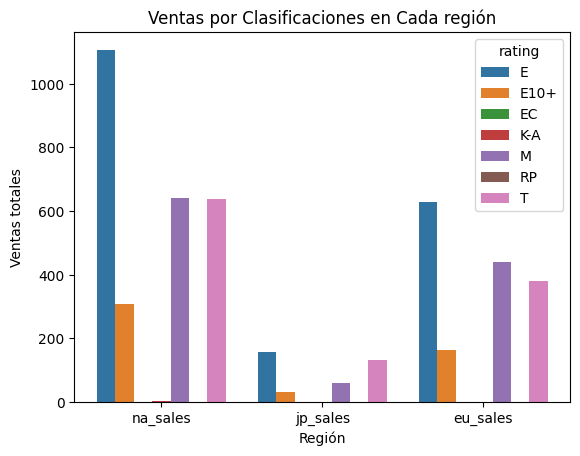

In [35]:
fig=sns.barplot(score_rating, x="market", y="sales",hue="rating")
fig.set_title('Ventas por Clasificaciones en Cada región')
fig.set_xlabel('Región')
fig.set_ylabel('Ventas totales')
fig.plot()

|ESRB Rating Symbols|Clasificación| 
|----------|----------|
| E      | Todas las Edades  | 
| E10+     | Mayores de 10 años   | 
| EC      | Todas las Edades   | 
| K-A      |  Todas las Edades  | 
| M       | Mayores de 18 años   | 
| RP       | Calificación Pendiente   | 
| T      | Mayores de 13 años   | 


Las clasificaciones de ESRB llegan afectar las ventas en cada región ya que la mas preferida en todas es el rating E que refiere a todas las edades, seguido por mayores de edad referente a 13 y 18 años.

Teniendo en cuenta que Norteamérica es la principal fuente de ventas seguido de Europa y quedando Japón al final.

# Paso 5

5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

     Establece tu mismo el valor de umbral alfa.

Explica: 

 + Cómo formulaste las hipótesis nula y alternativa.

 + Qué criterio utilizaste para probar las hipótesis y por qué.
 

## Hipotesis 1 

+ H0: Las calificaciones promedio de los usuarios de la plataforma Xbox One y Pc son las mismas.

+ H1: Las calificaciones promedio de los usuarios de la plataforma Xbox One y Pc son diferentes.

In [36]:
score_xone=df_games[df_games["platform"]=="XOne"]["user_score"].dropna()
score_pc=df_games[df_games["platform"]=="PC"]["user_score"].dropna()

Definimos el test y el valor de significancia 

+ Usaremos el nivel estandar para alpha de 0.5

+ Queremos comparar dos categorias con respecto a una varibale numerica en donde desconocemos las desviaciones estandar de la población, por lo que lo más adecuado según lo visto es utilizar el t-test.



In [37]:
alpha=0.5
results2=st.ttest_ind(
    score_xone,
    score_pc
)

print(f"""
      La clasificación promedio de profesionales para la Xbox es:{score_xone.mean()}
      La clasificación promedio de profesionales para la PC es:{score_pc.mean()}

    
      p-value:{results2.pvalue}

      """)

if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipotesis nula")


      La clasificación promedio de profesionales para la Xbox es:6.521428571428572
      La clasificación promedio de profesionales para la PC es:7.062467532467533

    
      p-value:1.3896435533548819e-05

      
Rechazamos la hipótesis nula


    Conclusión de la Primer Hipotesis.

No hay evidencia suficiente para rechazar la hipotesis nula  ya promedio de los usuarios de la plataforma Xbox One y Pc son diferentes.


# Hipotesis 2 

+ H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

+ H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Definimos el test y el valor de significancia 

+ Usaremos el nivel estandar para alpha de 0.5

+ Queremos comparar dos categorias con respecto a una varibale numerica en donde desconocemos las desviaciones estandar de la población, por lo que lo más adecuado según lo visto es utilizar el t-test

In [38]:
df_games["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [39]:
score_action=df_games[df_games["genre"]=="Action"]["user_score"].dropna()
score_sports=df_games[df_games["genre"]=="Sports"]["user_score"].dropna()

In [41]:
alpha=0.5
results=st.ttest_ind(
    score_action,
    score_sports
)

print(f"""
      La clasificación promedio para del género de Acción es :{score_action.mean()}
      La clasificación promedio para del género de Deportes es:{score_sports.mean()}

      
      p-value:{results.pvalue}

      """)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipotesis nula")


      La clasificación promedio para del género de Acción es :7.054043715846995
      La clasificación promedio para del género de Deportes es:6.961196736174069

      
      p-value:0.10406951359049141

      
Rechazamos la hipótesis nula


    Conclusión de la Segunda Hipotesis.

No hay evidencia suficiente para rechazar la hipotesis nula  promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Conclusiones Finales

En conclusión el análisis del mercado de videojuegos revela diferentes aspectos interesantes, ya que los juegos Los juegos de acción, deportes y disparos son más populares en el mercado.

El análisis de mercado también refiere a que existen tres principales empresas de creación de videojuegos como son:

+ Xbox

+ Play Station

+ Nintendo 

En cuanto a las regiones Observamos que la venta de video juegos en Norte América es mayor a las Regiones de Japón y de Europa, en cuestión de géneros, clasificación y plataforma. 

Ya que recordemos que las consolas más populares en esos tiempos era la GAME BOY, PS2, PS3 XBOX360 Y WII, con una gran cantidad de video juegos en cada una de estas plataformas.


[Link HitHub Repositorio](https://github.com/GabrielChavezC/Proyecto_integrador_ds)